# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane are more effective in reducing the size of tumors than Infubinol and Ceftamine; with Infubinol having 1 outlier. 
- We should note that both Capomulin and Ramicane were used more during the testing than the other drugs during the study. 
- When looking at the linear regression, weight has a strong positive correlation (84%) when compared to average Tumor volume. We can concluded that the heavier the mouse, the larger the volume of the tumor. 

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# find the number of mice
num_mice= len(combined_data["Mouse ID"].unique())
print(num_mice)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
dupes_data = combined_data[combined_data.duplicated(["Mouse ID","Timepoint"])]

# duplicate mice by ID number
dupes_mice = dupes_data["Mouse ID"].unique()

print(dupes_mice,)


['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupes_data_mouse_id = combined_data.loc[combined_data["Mouse ID"]=="g989",:]

pd.DataFrame(dupes_data_mouse_id)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data_clean = combined_data[combined_data['Mouse ID'].isin(dupes_mice)==False]

# disply dataframe
combined_data_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Number of mice IDs after dropped ID. Should = num_mice-1(248)
num_mice_clean= len(combined_data_clean["Mouse ID"].unique())
print(num_mice_clean)

248


## Summary Statistics

In [7]:
# print columns of cleaned data
print(combined_data_clean.columns)


Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Group data by Drug Regimen
gd_DR= combined_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)']

# summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
gd_mean= gd_DR.mean()
gd_median = gd_DR.median()
gd_variance = gd_DR.var()
gd_std = gd_DR.std()
gd_sem = gd_DR.apply(lambda x: np.std(x)/ np.sqrt(len(x)))

# Assemble the resulting series into a single summary DataFrame.
ss_df= pd.DataFrame({'Mean': gd_mean,
    'Median': gd_median,
    'Variance': gd_variance,
    'Standard Deviation': gd_std,
    'SEM': gd_sem})


# disply dataframe
ss_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.328629
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.468499
Infubinol,52.884795,51.820584,43.128684,6.567243,0.490851
Ketapril,55.235638,53.698743,68.553577,8.279709,0.602252
Naftisol,54.331565,52.509285,66.173479,8.134708,0.594860
Placebo,54.033581,52.288934,61.168083,7.821003,0.579722
Propriva,52.320930,50.446266,43.852013,6.622085,0.542490
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320250
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.571526


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line(summary stats aggregated= ss_dfa )
ss_dfa = combined_data_clean[["Drug Regimen","Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).agg(['mean', 'median','var', 'std', 'sem'])

# Display the summary statistics table
ss_dfa

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

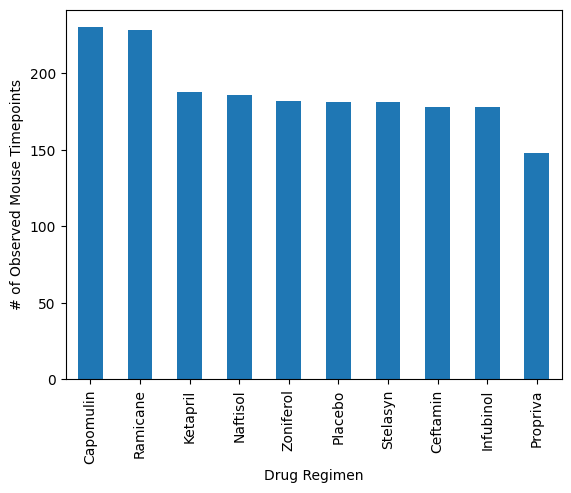

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

pandas_bp = combined_data_clean.groupby('Drug Regimen')['Timepoint'].count()

pandas_bp = pandas_bp.sort_values(ascending=False)

# Create a bar plot
pandas_bp_plot = pandas_bp.plot.bar()

# Set the axis labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Show the plot
plt.show()

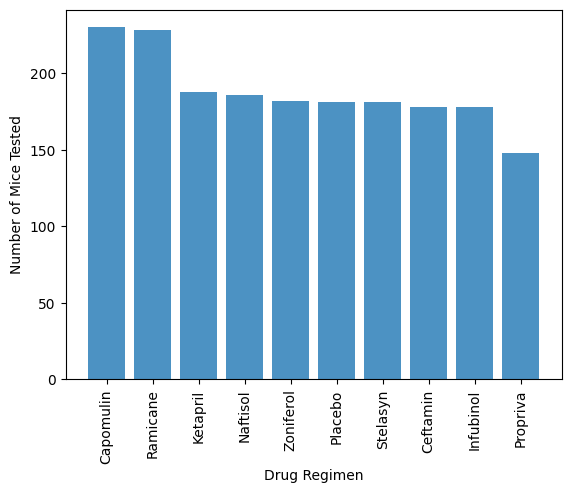

In [23]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
pyplot_bp = combined_data_clean.groupby('Drug Regimen')['Timepoint'].count()

# Sort the data by count
pyplot_bp_sorted = pyplot_bp.sort_values(ascending=False)

# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = pyplot_bp_sorted.index.values
y_axis = pyplot_bp_sorted.values



# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, alpha=0.8, align='center')


# Set the xlabel and ylabel, title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")

plt.show()

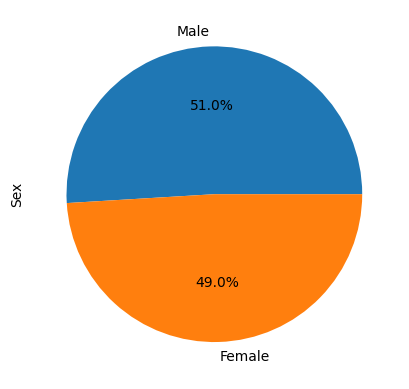

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
cdc_df = combined_data_clean

# Identify distribution of data by sex
pandas_pc = cdc_df['Sex'].value_counts()

# Plot a pie chart filled with corresponding percentages 
pandas_pc.plot = pandas_pc.plot.pie(autopct='%1.1f%%')

# Show the plot
plt.show()

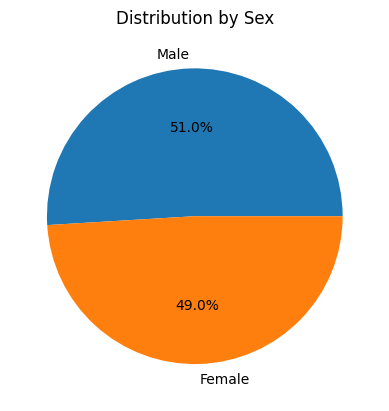

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Count the number of males and females
male_count = len(cdc_df[cdc_df['Sex'] == 'Male'])
female_count = len(cdc_df[cdc_df['Sex'] == 'Female'])


# Create a list of values to be plotted
values = [male_count, female_count]


# Create a list of labels for the pie chart
labels = ['Male', 'Female']

# Set the explode parameter to separate the slices of the pie chart
explode = [0.0, 0]

# Create the pie chart
plt.pie(values, explode=explode, labels=labels, autopct='%1.1f%%', startangle=0)

# Add a title to the pie chart
plt.title('Distribution by Sex')

# Show the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


In [15]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to store tumor volume data for plotting
vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:
    # Get the last (greatest) timepoint for each mouse on the current drug regimen
    last_timepoints = cdc_df.loc[cdc_df['Drug Regimen'] == drug].groupby('Mouse ID')['Timepoint'].max()
    
    # Merge the last timepoints with the original dataframe to get the final tumor volume for each mouse
    final_volumes = pd.merge(last_timepoints, cdc_df, on=['Mouse ID', 'Timepoint'], how='left')['Tumor Volume (mm3)']
    
    # Append the final tumor volume data to the vol_data list for plotting later
    vol_data.append(final_volumes)
    
    # Calculate the interquartile range (IQR) for the current drug regimen
    quartiles = final_volumes.quantile([0.25, 0.5, 0.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3 - q1
    
    # Determine outliers using upper and lower bounds
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    # Find outliers 
    outliers = list(final_volumes.loc[(final_volumes < lower_bound) | (final_volumes > upper_bound)])

    if outliers:
        print(f"{drug}'s potential outliers: {outliers}")
    else:
        print(f"{drug} has no outliers")


Capomulin has no outliers
Ramicane has no outliers
Infubinol's potential outliers: [36.3213458]
Ceftamin has no outliers


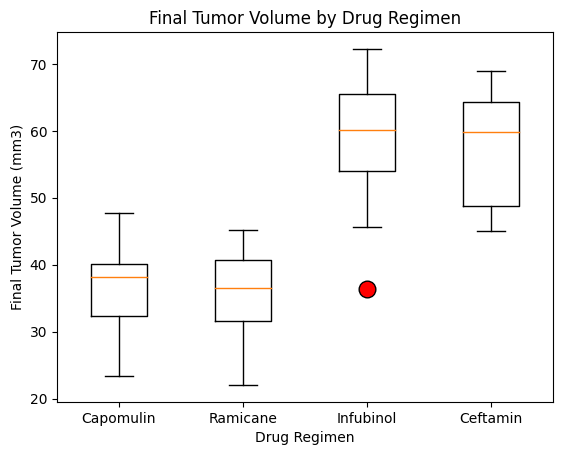

In [16]:
# Plot the box plot with red outliers
fig, ax = plt.subplots()

# Create the box plot with red outliers and larger dots
ax.boxplot(vol_data, flierprops=dict(markerfacecolor='red', markersize=12))

# Set the x-axis labels and title
ax.set_xticklabels(treatments)
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_title('Final Tumor Volume by Drug Regimen')

# Show the plot
plt.show()

## Line and Scatter Plots

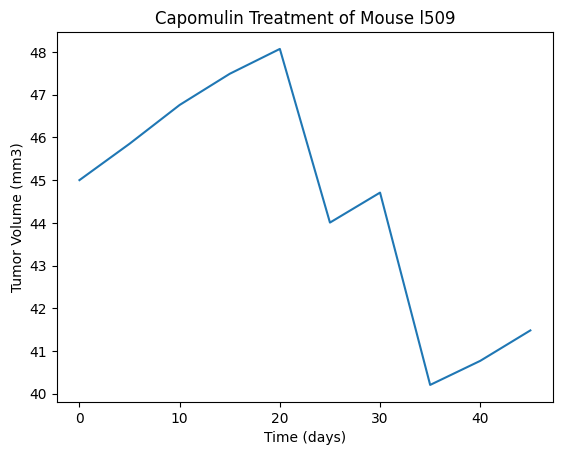

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Identify data points of a mouse treated with Capomulin
mouse = cdc_df.loc[cdc_df['Mouse ID'] == 'l509']

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")

# Display plot
plt.show()


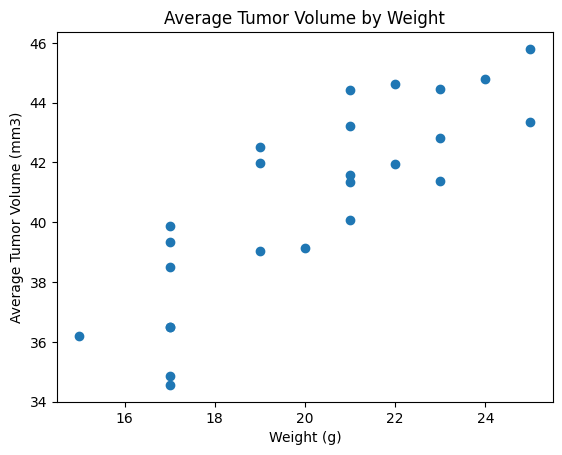

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Isolate cases that only use the Capomulin regimen
capomulin_df = cdc_df.loc[cdc_df['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')

# Display plot
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


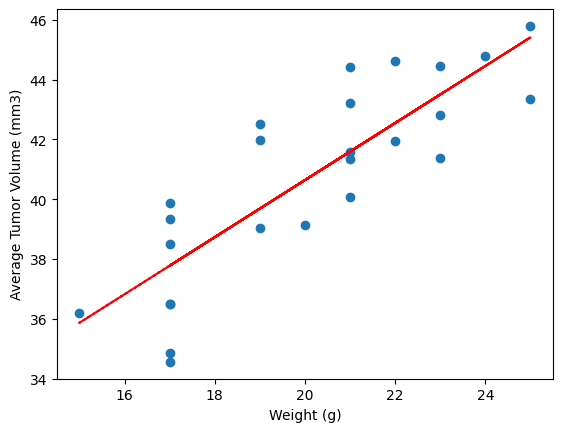

In [19]:
# Filter the data for the Capomulin regimen
capomulin_data = cdc_df.loc[cdc_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding weight for each mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Calculate the correlation coefficient
correlation = st.pearsonr(mouse_weight, avg_tumor_vol)
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation[0]:.2f}")

# Perform a linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(mouse_weight, avg_tumor_vol)

# Create scatter plot
plt.scatter(mouse_weight, avg_tumor_vol, marker='o')

# Add linear regression line
regress_values = mouse_weight * slope + intercept
plt.plot(mouse_weight, regress_values, color='red', linestyle='--')

# chart labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show plot
plt.show()

